<a href="https://colab.research.google.com/github/RodrigoMarenda/Sports_Predictions/blob/main/notebooks/Sports_Predctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Previsões de Partidas de Futebol Baseadas em Resultados Históricos</p>

![Previsões de Partidas de Futebol Baseadas em Resultados Históricos](https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/Crystal_Ball.jpeg?raw=true)

# **Introdução**

### **Definição do Problema:**

O mercado de ações é um ambiente complexo e dinâmico, onde o valor das ações pode flutuar significativamente devido a diversos fatores. A análise de ações é a prática de avaliar empresas e determinar o valor intrínseco de suas ações. Essa avaliação é crucial para tomar decisões de investimento informadas e potencialmente lucrativas.


- **Objetivo:**

Este projeto visa desenvolver um modelo para prever o valor de ações por meio da análise de indicadores financeiros. Utilizando dados históricos coletados do site Status Invest, o modelo será treinado para reconhecer padrões e, assim, prever se uma ação está sendo negociada abaixo (barata), acima (cara) ou em linha (neutra) com seu valor intrínseco. Essas previsões podem auxiliar os investidores a decidir se devem comprar, vender, manter ou não fazer nada com ações de empresas específicas.


- **Descrição do Problema:**

A principal dificuldade em prever o valor de ações reside na complexa interação de diversos fatores que influenciam o mercado. O objetivo do projeto é encontrar um modelo que capture as principais características e relações entre os indicadores financeiros para realizar previsões precisas.

- **Tipo de Problema**

Este é um problema de **classificação supervisionada**, onde o modelo aprenderá a associar os atributos das ações a uma classe (barata, cara, neutra). Além disso, no tratamento dos dados, será adicionada uma **coluna alvo** contendo essas categorias, o que define o caráter supervisionado do problema.

- **Premissas e Hipóteses:**

  - **Premissa**: Os indicadores financeiros de uma empresa refletem sua saúde financeira e, portanto, influenciam o valor de suas ações.
  - **Hipótese**: Um modelo de machine learning treinado com dados históricos de indicadores financeiros pode identificar padrões que ajudem a prever se uma ação está subvalorizada, sobrevalorizada ou adequadamente precificada.

- **Restrições e Condições:**

  - **Restrição**: Os dados utilizados para treinar o modelo foram obtidos exclusivamente do site Status Invest.
  - **Condição**: O modelo será aplicado apenas a ações para as quais há histórico de indicadores financeiros disponíveis no site.

Essas alterações fornecem uma explicação mais clara e precisa das premissas do projeto e das condições sob as quais o modelo será desenvolvido e aplicado.

  OBS: Encontrar dados de outras fontes tem sido desafiador. Enquanto é relativamente fácil encontrar o histórico de preços das ações, o mesmo não se aplica aos indicadores financeiros, que até o momento só foram encontrados no site Status Invest. Além disso, os indicadores estão disponíveis apenas em uma base anual. Para contornar essa limitação e garantir uma quantidade adequada de dados, foram utilizados os indicadores financeiros de várias empresas.


- **Descrição do dataset:**

Cada entrada no dataset corresponde a uma empresa em um determinado ano, identificada pelo código do Ticker, com informações do preço médio da ação no ano seguinte (PrecoAnoSeguinte) e no ano atual (PrecoAnoAtual). O atributo Alvo indica se a ação é considerada Barata (quando o preço médio do ano seguinte é 15% maior que o preço médio do ano atual), Cara (quando o preço médio do ano seguinte é 15% menor que o preço médio do ano atual) ou Neutra (quando o preço médio do ano seguinte está dentro de uma faixa de 15% para mais ou para menos).
  

## **Estrutura do projeto:**

[**1. Importação das Bibliotecas:**](#1)

[**2. Carregamento dos Dados:**](#2)

[**3. Pré-processamento de dados:**](#3)

[**4. Análise da Distribuição dos Dados:**](#4)

[**5. Escolha do algoritmo:**](#5)

[**6. Otimização do modelo:**](#6)

[**7. Valiação dos resultados:**](#7)

[**8. Conclusão:**](#8)


Explicação das Etapas
Pré-processamento de Dados:

Limpeza, transformação e divisão em conjuntos de treino e teste.
Padronização dos dados para melhorar o desempenho de alguns algoritmos.
Análise da Distribuição dos Dados:

Visualizações que ajudam a entender a distribuição dos dados e a correlação entre variáveis.
Escolha do Algoritmo:

Um modelo inicial é escolhido (nesse caso, o RandomForestClassifier), e ele é treinado com os dados de treino.
Otimização do Modelo:

Busca por hiperparâmetros usando GridSearchCV para encontrar a combinação de parâmetros que maximiza a acurácia.
Avaliação dos Resultados:

Geração de previsões, cálculo de acurácia, e exibição de métricas e visualizações de desempenho.
Essa estrutura facilita ajustes, novos testes e análise de resultados ao longo do projeto.











ChatGPT p


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>


In [ ]:
# Imports das Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import os
import random

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from joblib import dump


# Configuração para não exibir os warnings
warnings.filterwarnings("ignore")


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carregamento dos Dados</p>

Esse dataset foi obtido no Site Base de Dados.Org. Foram coletados das partidas de futebol realizadas desde 2013 até o ano de 2024, com o objetivo de realizar a predição de resultados de jogos de futebol.



In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/RodrigoMarenda/Sports_Predictions/refs/heads/main/data/Dados_Brasileirao.csv"

# Lê o arquivo e exibe as primeiras linhas
df = pd.read_csv(url, delimiter=',')


# Exibir as primeiras linhas do DataFra
df.head()



,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2013,2013-12-01,37,Estádio Moisés Lucarelli,Márcio Chagas da Silva,2390.0,19728.0,Ponte Preta,Portuguesa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,2013-11-24,36,Estádio Paulo Constantino,Francisco Carlos do Nascimento,4369.0,20000.0,Santos FC,Fluminense,Claudinei Oliveira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2013-11-24,36,Arena Fonte Nova,Ricardo Marques Ribeiro,31025.0,55000.0,EC Bahia,Portuguesa,Cristóvão Borges,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,2013-05-26,1,Estádio Nacional de Brasília Mané Garrincha,Wilton Sampaio,63501.0,72788.0,Santos FC,Flamengo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,2013-05-30,2,Estádio Municipal Radialista Mário Helênio,Jean Pierre Goncalves Lima,8932.0,NaN,Flamengo,Ponte Preta,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Verificando o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 8402 linhas e 35 colunas.


In [ ]:
# Verificando a extrutura do dataset, datatypes das colunas
df.dtypes

,0
ano_campeonato,int64
data,object
rodada,int64
estadio,object
arbitro,object
publico,float64
publico_max,float64
time_mandante,object
time_visitante,object
tecnico_mandante,object


Os tipos de dados estão corretos. Na proxima etapa vamos fazer as trativas de ETL dos dados.

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Pré-processamento de dados:</p>


Nessa etapa será realizado a limpeza, transformação e divisão em conjuntos de treino e teste. Também faremos a padronização dos dados para melhorar o desempenho de alguns algoritmos.

In [ ]:
# Preparação dos dados


# Removendo algumas colunas do DataFrame
colunas_para_remover = ['arbitro', 'gols_1_tempo_mandante','gols_1_tempo_visitante','escanteios_mandante','escanteios_visitante','faltas_mandante',
'faltas_visitante','chutes_bola_parada_mandante','chutes_bola_parada_visitante','defesas_mandante','defesas_visitante','impedimentos_mandante','impedimentos_visitante','chutes_mandante','chutes_visitante',
'chutes_fora_mandante','chutes_fora_visitante']

df_selecionado = df.drop(columns=colunas_para_remover)


# Exibindo as primeiras linhas do DataFrame com as colunas removidas
df_selecionado.head()


# Verificando se existem valores ausentes no dataset
print(df_selecionado.isnull().sum())


# Verificando o tamanho do dataset , total de linhas e colunas.
df_selecionado.shape
print(f"O Dataset tem {df_selecionado.shape[0]} linhas e {df_selecionado.shape[1]} colunas.")



ano_campeonato                       0
data                                 0
rodada                               0
estadio                             11
publico                           1711
publico_max                       4271
time_mandante                        0
time_visitante                       0
tecnico_mandante                  2154
tecnico_visitante                 2154
colocacao_mandante                1710
colocacao_visitante               1710
valor_equipe_titular_mandante     2098
valor_equipe_titular_visitante    2098
idade_media_titular_mandante      2100
idade_media_titular_visitante     2100
gols_mandante                        3
gols_visitante                       3
dtype: int64
O Dataset tem 8402 linhas e 18 colunas.


Iniciando Tratativa para Valores ausentes em cada linha e coluna.

Para tratar os Valores nulos, foram adotadas algumas regras de acordo com cada tipo de dado, de forma que essas atribuições de valores não geracem impacto de tendencia para a analise.  


In [ ]:


# Tratativa para Valores ausentes
# Loop para verificar e substituir valores nulos em cada coluna
for index, row in df_selecionado.iterrows():

    # estadio                             11
    if pd.isnull(row['estadio']):  # Verificando se o valor da coluna 'estadio' é nulo
        df_selecionado.at[index, 'estadio'] = 'Desconhecido'  # Substituindo por um valor


    #publico                           1711
    if pd.isnull(row['publico']):  # Verificando se o valor da coluna 'publico' é nulo
        df_selecionado.at[index, 'publico'] = 1000  # Substituindo por valor publico minimo


    #publico_max                       4271
    if pd.isnull(row['publico_max']):  # Verificando se o valor da coluna 'publico_max' é nulo
        df_selecionado.at[index, 'publico_max'] = 1000  # Substituindo por valor publico max

    #tecnico_mandante                       2154
    if pd.isnull(row['tecnico_mandante']):  # Verificando se o valor da coluna 'tecnico_mandante' é nulo
        df_selecionado.at[index, 'tecnico_mandante']  = 'Desconhecido'  # Substituindo por valor

    #tecnico_visitante                       2154
    if pd.isnull(row['tecnico_visitante']):  # Verificando se o valor da coluna 'tecnico_visitante' é nulo
        df_selecionado.at[index, 'tecnico_visitante']  = 'Desconhecido'  # Substituindo por valor

    ##colocacao_mandante                1710
    if pd.isnull(row['colocacao_mandante']):  # Verificando se o valor da coluna 'colocacao_mandante' é nulo
        df_selecionado.at[index, 'colocacao_mandante']  = 0  # Substituindo por valor zero

    ##colocacao_visitante               1710
    if pd.isnull(row['colocacao_visitante']):  # Verificando se o valor da coluna 'colocacao_visitante' é nulo
        df_selecionado.at[index, 'colocacao_visitante']  = 0  # Substituindo por valor zero

    #valor_equipe_titular_mandante     2098
    if pd.isnull(row['valor_equipe_titular_mandante']):  # Verificando se o valor da coluna 'valor_equipe_titular_mandante' é nulo
        df_selecionado.at[index, 'valor_equipe_titular_mandante']  = 50000  # Substituindo por valor minimo

    #valor_equipe_titular_visitante     2098
    if pd.isnull(row['valor_equipe_titular_visitante']):  # Verificando se o valor da coluna 'valor_equipe_titular_visitante' é nulo
        df_selecionado.at[index, 'valor_equipe_titular_visitante']  = 50000  # Substituindo por valor  minimo

    #idade_media_titular_mandante     2100
    if pd.isnull(row['idade_media_titular_mandante']):  # Verificando se o valor da coluna 'idade_media_titular_mandante' é nulo
        df_selecionado.at[index, 'idade_media_titular_mandante']  = 30  # Substituindo por valor medio

    #idade_media_titular_visitante     2100
    if pd.isnull(row['idade_media_titular_visitante']):  # Verificando se o valor da coluna 'idade_media_titular_visitante' é nulo
        df_selecionado.at[index, 'idade_media_titular_visitante']  = 30  # Substituindo por valor medio

    #gols_mandante                     3
    if pd.isnull(row['gols_mandante']):  # Verificando se o valor da coluna 'gols_mandante' é nulo
        df_selecionado.at[index, 'gols_mandante']  = 0  # Substituindo por valor zero

    #gols_visitante                    3
    if pd.isnull(row['gols_visitante']):  # Verificando se o valor da coluna 'gols_visitante' é nulo
        df_selecionado.at[index, 'gols_visitante']  = 0  # Substituindo por valor zero


df_selecionado.head()

# Verificando se existem valores ausentes no dataset
print(df_selecionado.isnull().sum())




ano_campeonato                    0
data                              0
rodada                            0
estadio                           0
publico                           0
publico_max                       0
time_mandante                     0
time_visitante                    0
tecnico_mandante                  0
tecnico_visitante                 0
colocacao_mandante                0
colocacao_visitante               0
valor_equipe_titular_mandante     0
valor_equipe_titular_visitante    0
idade_media_titular_mandante      0
idade_media_titular_visitante     0
gols_mandante                     0
gols_visitante                    0
dtype: int64


Inicando Tratamentos de Divisão dos Dados

In [141]:
# Codificando variáveis categóricas para valores numéricos (Label Encoding)
label_encoder = LabelEncoder()

df_selecionado['time_mandante'] = label_encoder.fit_transform(df_selecionado['time_mandante'])
df_selecionado['time_visitante'] = label_encoder.fit_transform(df_selecionado['time_visitante'])
df_selecionado['estadio'] = label_encoder.fit_transform(df_selecionado['estadio'])
df_selecionado['tecnico_mandante'] = label_encoder.fit_transform(df_selecionado['tecnico_mandante'])
df_selecionado['tecnico_visitante'] = label_encoder.fit_transform(df_selecionado['tecnico_visitante'])

# Criando o target: Se o time mandante ganhou, visitante ganhou ou foi empate
df_selecionado['resultado'] = df_selecionado.apply(
    lambda row: 1 if row['gols_mandante'] > row['gols_visitante']
                else 0 if row['gols_mandante'] < row['gols_visitante']
                else 2,
    axis=1
)

# Exibindo as primeiras linhas para confirmar o resultado
print(df_selecionado[['gols_mandante', 'gols_visitante', 'resultado']].head())


# Exibindo as primeiras linhas do dataset após o pré-processamento
df_selecionado.head()


   gols_mandante  gols_visitante  resultado
0            0.0             2.0          0
1            1.0             0.0          1
2            1.0             0.0          1
3            0.0             0.0          2
4            0.0             2.0          0


,ano_campeonato,data,rodada,estadio,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,tecnico_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante,resultado,Resultado_Label
0,2013,2013-12-01,37,51,2390.0,19728.0,36,37,47,47,19.0,18.0,50000.0,50000.0,30.0,30.0,0.0,2.0,0,Visitante Venceu
1,2013,2013-11-24,36,66,4369.0,20000.0,42,22,33,55,10.0,12.0,23700000.0,20300000.0,26.6,27.4,1.0,0.0,1,Mandante Venceu
2,2013,2013-11-24,36,3,31025.0,55000.0,18,37,41,100,13.0,17.0,5800000.0,4400000.0,25.5,28.3,1.0,0.0,1,Mandante Venceu
3,2013,2013-05-26,1,61,63501.0,72788.0,42,21,47,47,12.0,19.0,50000.0,50000.0,30.0,30.0,0.0,0.0,2,Empate
4,2013,2013-05-30,2,59,8932.0,1000.0,21,36,47,47,19.0,16.0,50000.0,50000.0,30.0,30.0,0.0,2.0,0,Visitante Venceu


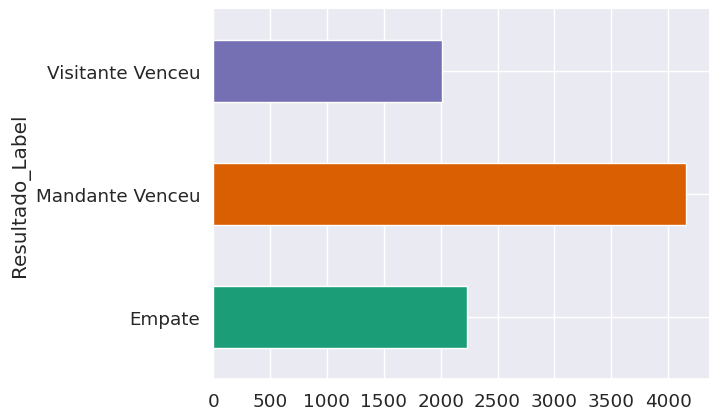

In [143]:
# @title Resultado_Label

from matplotlib import pyplot as plt
import seaborn as sns
df_selecionado.groupby('Resultado_Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

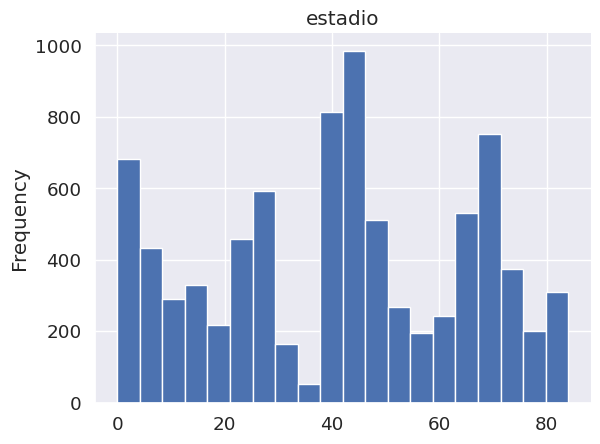

In [ ]:
# @title estadio

from matplotlib import pyplot as plt
df_selecionado['estadio'].plot(kind='hist', bins=20, title='estadio')
plt.gca().spines[['top', 'right',]].set_visible(False)

Vamos ajustar essa variável categórica transformando-a em uma variável numérica.

<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Análise da Distribuição dos Dados:</p>


Nessa etapa teremos as Visualizações que ajudam a entender a distribuição dos dados e a correlação entre variáveis.

In [ ]:
# Analisando a distribuição do público
sns.histplot(df_selecionado['publico'], kde=True)
plt.title('Distribuição do Público')
plt.show()

# Verificando a distribuição do resultado da partida (vencedor)
sns.countplot(x='resultado', data=df_selecionado)
plt.title('Distribuição de Vitória do Mandante (1) vs Visitante (0), Empate (2)')
plt.show()

# Verificando a correlação entre as variáveis numéricas
# Selecionando apenas as colunas numéricas para a matriz de correlação
df_numerico = df_selecionado.select_dtypes(include=[np.number])

# Verificando a correlação entre as variáveis numéricas
corr_matrix = df_numerico.corr()

# Exibindo a matriz de correlação com um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()




Está um pouco desbalanceado, mas optamos por não utilizar técnicas de oversampling ou undersampling para manter a representatividade do mercado real.

ValueError: num must be an integer with 1 <= num <= 15, not 16

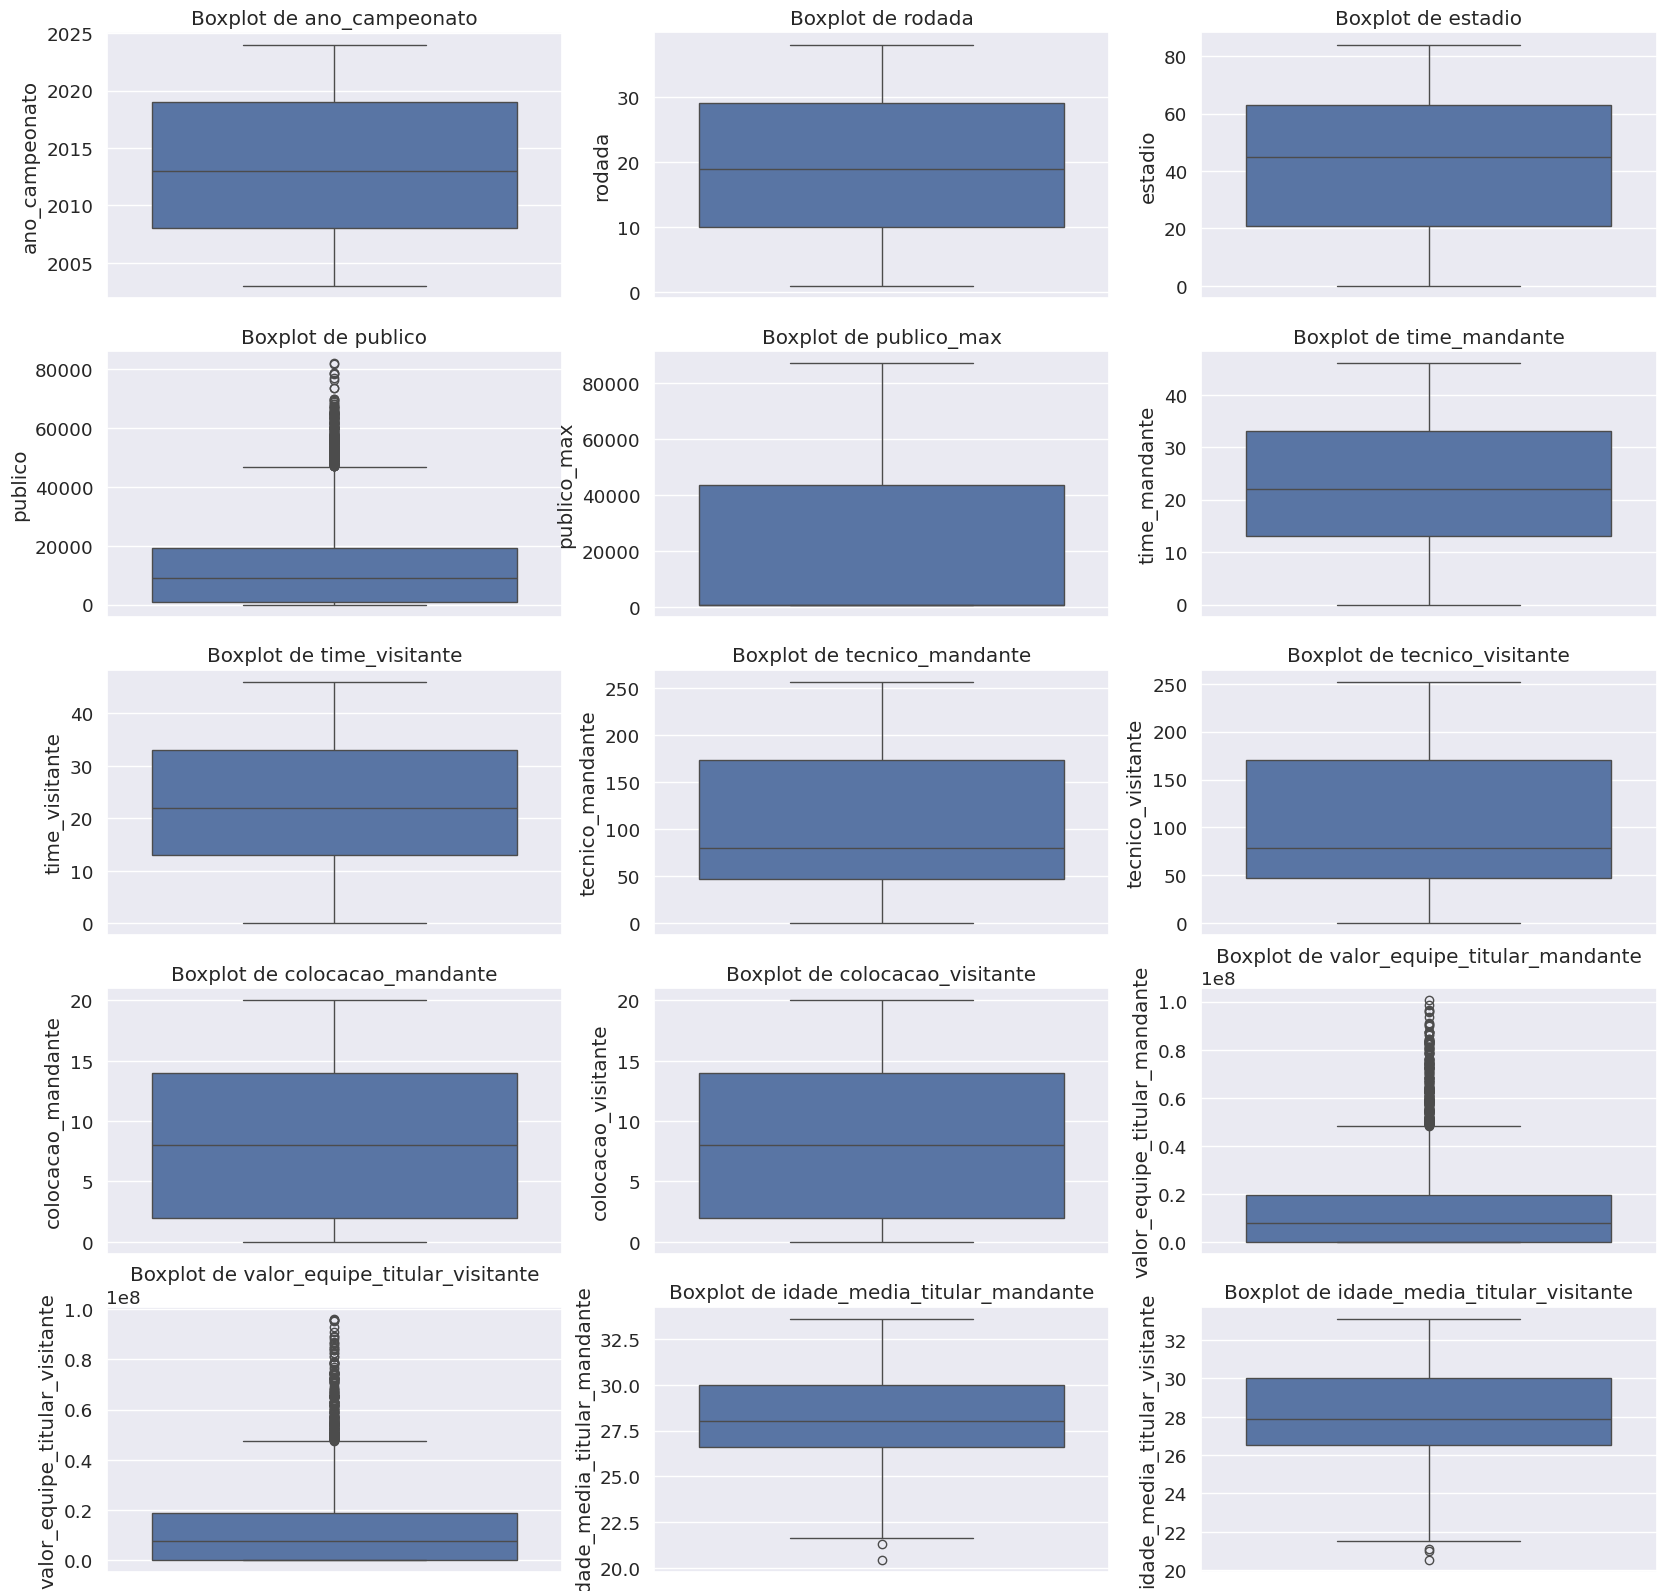

In [144]:
plt.figure(figsize=(20, 20))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df_selecionado[var].dropna())
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


Os outliers que observamos são importantes, pois indicam variações significativas entre as empresas. Essas diferenças podem ser causadas por diversos fatores do mercado ou estratégias empresariais. Portanto, optamos por mantê-los em nossa análise, pois eles são relevantes para uma avaliação abrangente e precisa, evitando distorções nos resultados.

Como esperado, observamos uma relação entre os indicadores de retorno sobre o patrimônio líquido (ROE), retorno sobre o capital investido (ROIC) e retorno sobre os ativos (ROA) com os indicadores de lucratividade EBITIDA, além de uma correlação com o indicador composto CAGR (CAGR RECEITAS 5 ANOS e CAGR LUCROS 5 ANOS).

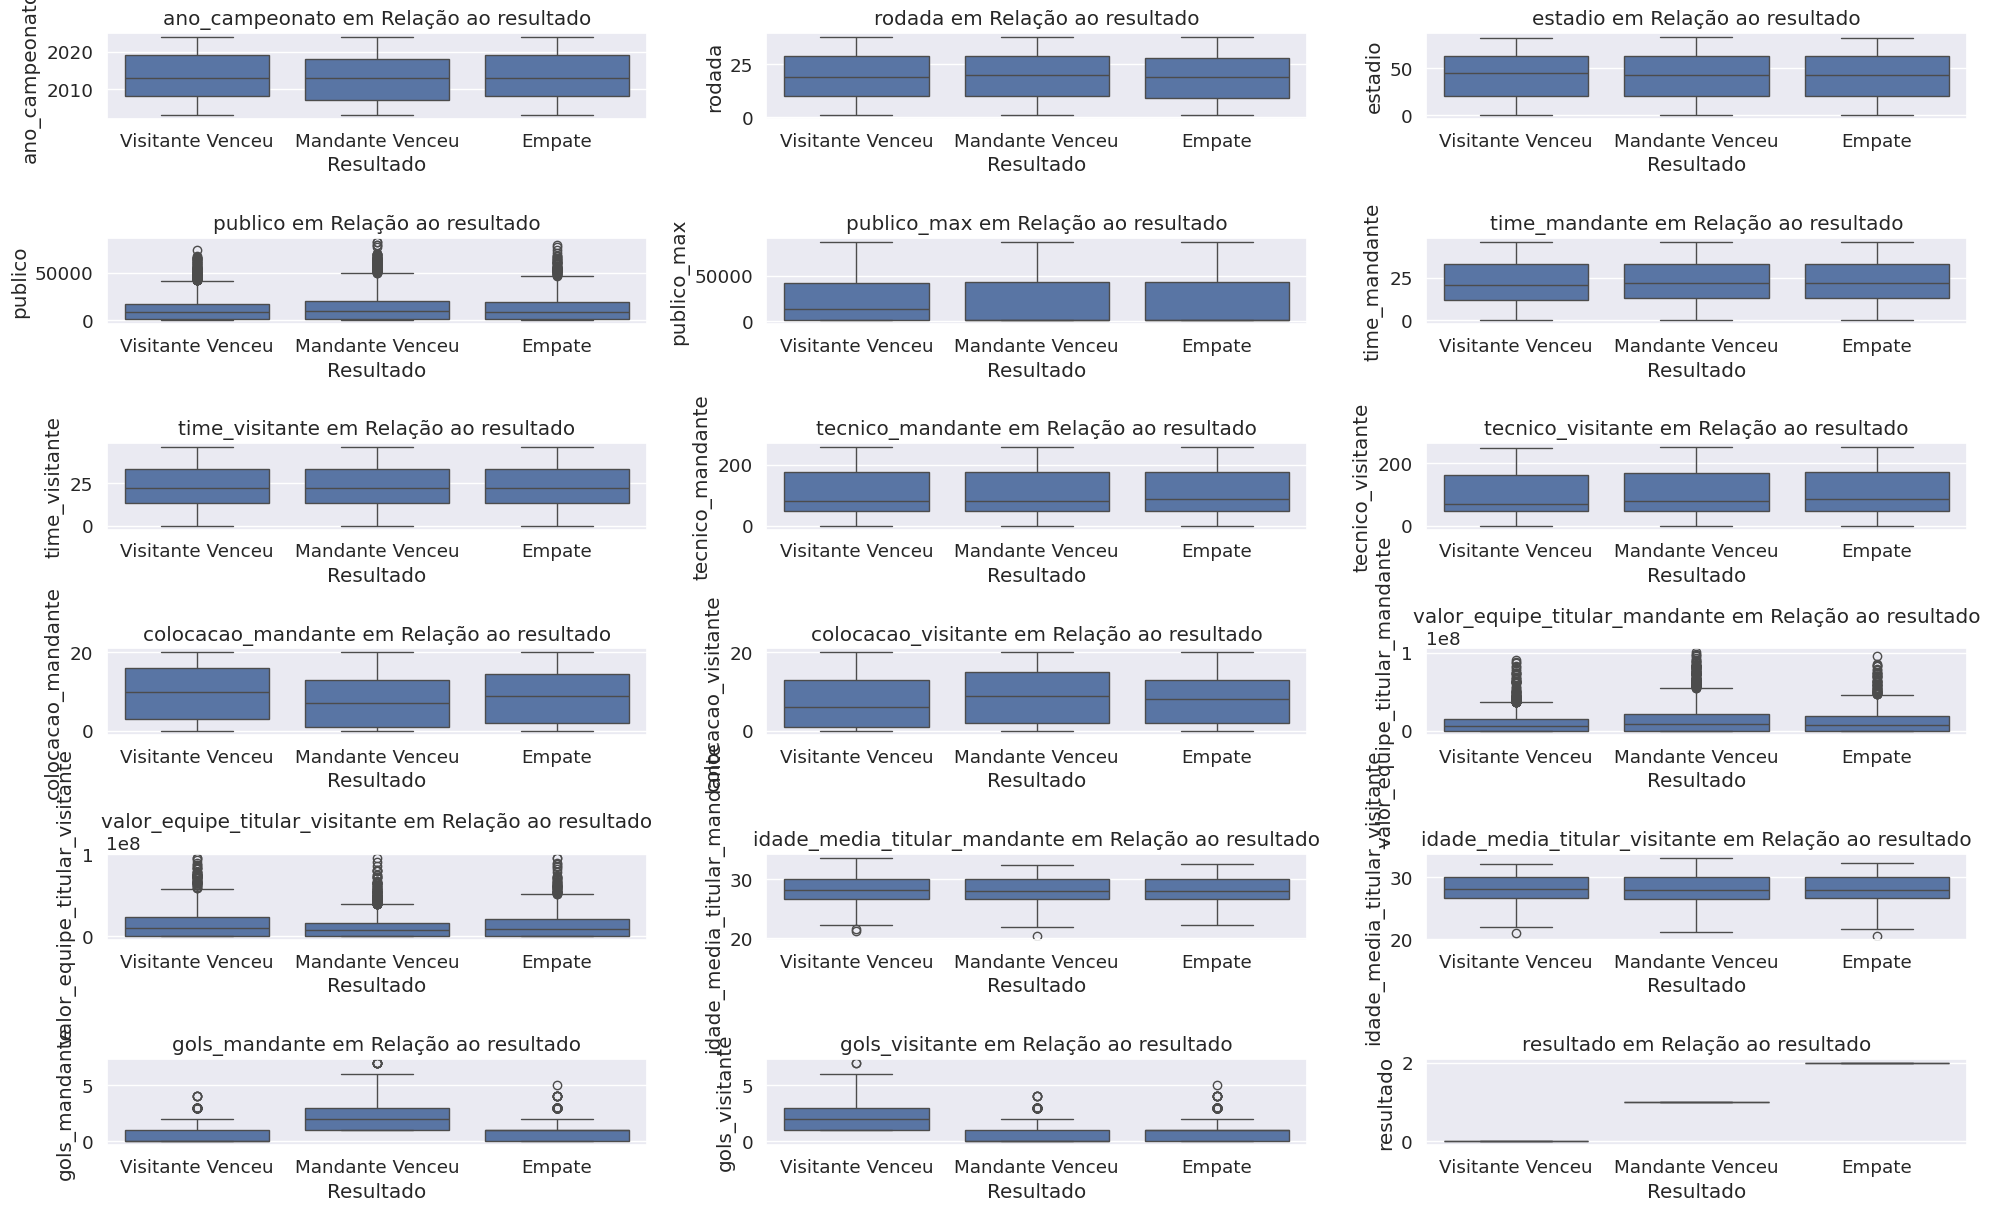

In [140]:
# Definindo as classes para mapeamento do resultado
class_names = {1: "Mandante Venceu", 0: "Visitante Venceu", 2: "Empate"}
df_selecionado["Resultado_Label"] = df_selecionado["resultado"].map(class_names)

# Selecionando apenas as variáveis numéricas para o gráfico
numeric_vars = df_selecionado.select_dtypes(include=[np.number]).columns

# Definindo o tamanho da figura para exibir todos os gráficos
plt.figure(figsize=(20, 20))

# Loop para criar um boxplot para cada variável numérica em relação ao "Resultado"
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(x="Resultado_Label", y=var, data=df_selecionado)
    plt.title(f'{var} em Relação ao resultado')
    plt.xlabel('Resultado')
    plt.ylabel(var)

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()


Ao analisar os boxplots das variáveis numéricas em relação ao alvo ("Barata", "Cara", "Neutra"), observa-se que não há uma clara diferenciação entre as categorias. Os gráficos mostram que a maioria dos valores está distribuída de forma equilibrada entre as categorias, com exceção de alguns outliers que estão mais distantes da distribuição principal. Isso sugere que essas variáveis podem não ter uma relação direta ou significativa com a classificação das ações como "Barata", "Cara" ou "Neutra".

<a id="3"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5. Escolha do algoritmo:</p>


Nessa etapa um modelo inicial é escolhido (nesse caso, o RandomForestClassifier), e ele é treinado com os dados de treino.


## Primeiro vamos fazer o split dos dados

Observação: não utilizamos validação cruzada devido ao nosso dataset conter poucos dados. Realizamos um teste com validação cruzada, onde a média da acurácia foi de 0.46. Portanto, é possível esperar que nosso modelo tenha um desempenho um pouco inferior em produção do que o resultado obtido neste teste.

In [ ]:
# Seleção das variáveis de entrada (features) e alvo (target)
X = df_selecionado[['publico', 'publico_max', 'colocacao_mandante', 'colocacao_visitante',
        'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
        'idade_media_titular_mandante', 'idade_media_titular_visitante',
        'tecnico_mandante', 'tecnico_visitante', 'estadio']]
y = df_selecionado['resultado']  # 1 = Mandante vence, 0 = Visitante vence

# Dividindo os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Vamos remover as linhas sem alvo para validar o modelo posteriormente.

Realizamos um teste com um conjunto reduzido de características, selecionando aquelas que consideramos mais importantes para o valor da ação. No entanto, o resultado foi inferior ao usar o conjunto completo de features, que inclui a coluna gerada com a fórmula de Graam.

In [ ]:

print("Dimensões do conjunto de treinamento (features):", X_train.shape)
print("Dimensões do conjunto de teste (features):", X_test.shape)
print("Dimensões do conjunto de treinamento (Resultado):", y_train.shape)
print("Dimensões do conjunto de teste (Resultado):", y_test.shape)


Dimensões do conjunto de treinamento (features): (5881, 11)
Dimensões do conjunto de teste (features): (2521, 11)
Dimensões do conjunto de treinamento (Resultado): (5881,)
Dimensões do conjunto de teste (Resultado): (2521,)


Agora, vamos aplicar uma técnica de escala nos nossos dados numéricos. É importante realizar essa etapa separadamente nos conjuntos de treinamento e teste para evitar vazamento de dados.

In [ ]:
scaler = Normalizer()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Vamos agora treinar os modelos utilizando os seguintes algoritmos: Random Forest, Gradient Boosting, Support Vector Machines (SVM), K-Nearest Neighbors (KNN) e Naive Bayes. Escolhemos esses algoritmos por sua eficácia e versatilidade em lidar com problemas de classificação. O Random Forest e o Gradient Boosting são conhecidos por sua capacidade de lidar com dados complexos e grandes conjuntos de dados, enquanto o SVM é eficaz na separação de classes em espaços de alta dimensão. O KNN é simples de entender e implementar, sendo útil para identificar padrões em conjuntos de dados menores. Por fim, o Naive Bayes é rápido e eficiente para conjuntos de dados com muitas features. Vamos comparar os resultados obtidos por cada um desses algoritmos, selecionar o melhor e, aprimorá-lo com a utilização de hiperparâmetros.

In [ ]:
rf = RandomForestClassifier(random_state=99)
gb = GradientBoostingClassifier(random_state=99)
svc = SVC(random_state=99)
knn = KNeighborsClassifier()
nb = GaussianNB()

rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
nb.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)
gb_pred = gb.predict(X_test_scaled)
svc_pred = svc.predict(X_test_scaled)
knn_pred = knn.predict(X_test_scaled)
nb_pred = nb.predict(X_test_scaled)

print("Random Forest:")
print(classification_report(y_test, rf_pred))

print("Gradient Boosting:")
print(classification_report(y_test, gb_pred))

print("Support Vector Machines:")
print(classification_report(y_test, svc_pred))

print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))

print("Naive Bayes:")
print(classification_report(y_test, nb_pred))


Random Forest:
              precision    recall  f1-score   support

           0       0.35      0.21      0.26       598
           1       0.54      0.81      0.65      1264
           2       0.31      0.14      0.19       659

    accuracy                           0.49      2521
   macro avg       0.40      0.38      0.37      2521
weighted avg       0.44      0.49      0.44      2521

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.42      0.18      0.26       598
           1       0.53      0.91      0.67      1264
           2       0.24      0.03      0.06       659

    accuracy                           0.51      2521
   macro avg       0.40      0.38      0.33      2521
weighted avg       0.43      0.51      0.41      2521

Support Vector Machines:
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       598
           1       0.50      1.00      0.67      1264
           2    

In [ ]:
rf = RandomForestClassifier(random_state=99)
gb = GradientBoostingClassifier(random_state=99)
svc = SVC(random_state=99)
knn = KNeighborsClassifier()
nb = GaussianNB()

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)
svc_pred = svc.predict(X_test)
knn_pred = knn.predict(X_test)
nb_pred = nb.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, rf_pred))

print("Gradient Boosting:")
print(classification_report(y_test, gb_pred))

print("Support Vector Machines:")
print(classification_report(y_test, svc_pred))

print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))

print("Naive Bayes:")
print(classification_report(y_test, nb_pred))

Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60      1257
           1       0.59      0.51      0.55      1264

    accuracy                           0.58      2521
   macro avg       0.58      0.58      0.58      2521
weighted avg       0.58      0.58      0.58      2521

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.55      0.68      0.61      1257
           1       0.59      0.45      0.51      1264

    accuracy                           0.57      2521
   macro avg       0.57      0.57      0.56      2521
weighted avg       0.57      0.57      0.56      2521

Support Vector Machines:
              precision    recall  f1-score   support

           0       0.54      0.78      0.64      1257
           1       0.61      0.33      0.43      1264

    accuracy                           0.56      2521
   macro avg       0.57      0.56      0.53      2521
weighted avg   

Não vamos utilizar a normalização dos dados, pois os resultados foram piores. Embora tenha havido uma melhora na acurácia para o Random Forest, atingindo 53%, a precisão da classe 1 foi significativamente reduzida para 0,31. Os outros algoritmos também apresentaram resultados inferiores.

### Portanto, vamos explorar mais a fundo os dados sem a normalização.

- Random Forest:

    - A precisão para a classe 1 é baixa, indicando dificuldade em identificar corretamente essa classe.
    - A acurácia geral foi de 51%, com um f1-score médio de 0.43.

- Gradient Boosting:

    - O modelo teve um desempenho melhor que o Random Forest, especialmente para as classes 1.
    - A acurácia geral foi de 50%, com um f1-score médio de 0.47.

- Support Vector Machines (SVM):

    - O SVM teve dificuldades em prever a classe 1, com uma precisão de 0%.
    - A acurácia geral foi de 45%, com um f1-score médio de 0.26.

- K-Nearest Neighbors (KNN):

    - O KNN teve um desempenho intermediário, com precisões e recalls equilibrados para as três classes.
    - A acurácia geral foi de 39%, com um f1-score médio de 0.35.

- Naive Bayes:

    - O Naive Bayes teve dificuldades em prever as classes 1 e 3, com baixa precisão e recall.
    - A acurácia geral foi de 41%, com um f1-score médio de 0.35.



Em geral, nenhum dos modelos apresentou um desempenho excepcional. O Gradient Boosting foi o melhor modelo em termos de acurácia e precisão para as três classes, mas ainda há espaço para melhorias. Vamos considerá-lo como o melhor modelo e tentar melhorar ainda mais seu desempenho ajustando os hiperparâmetros.

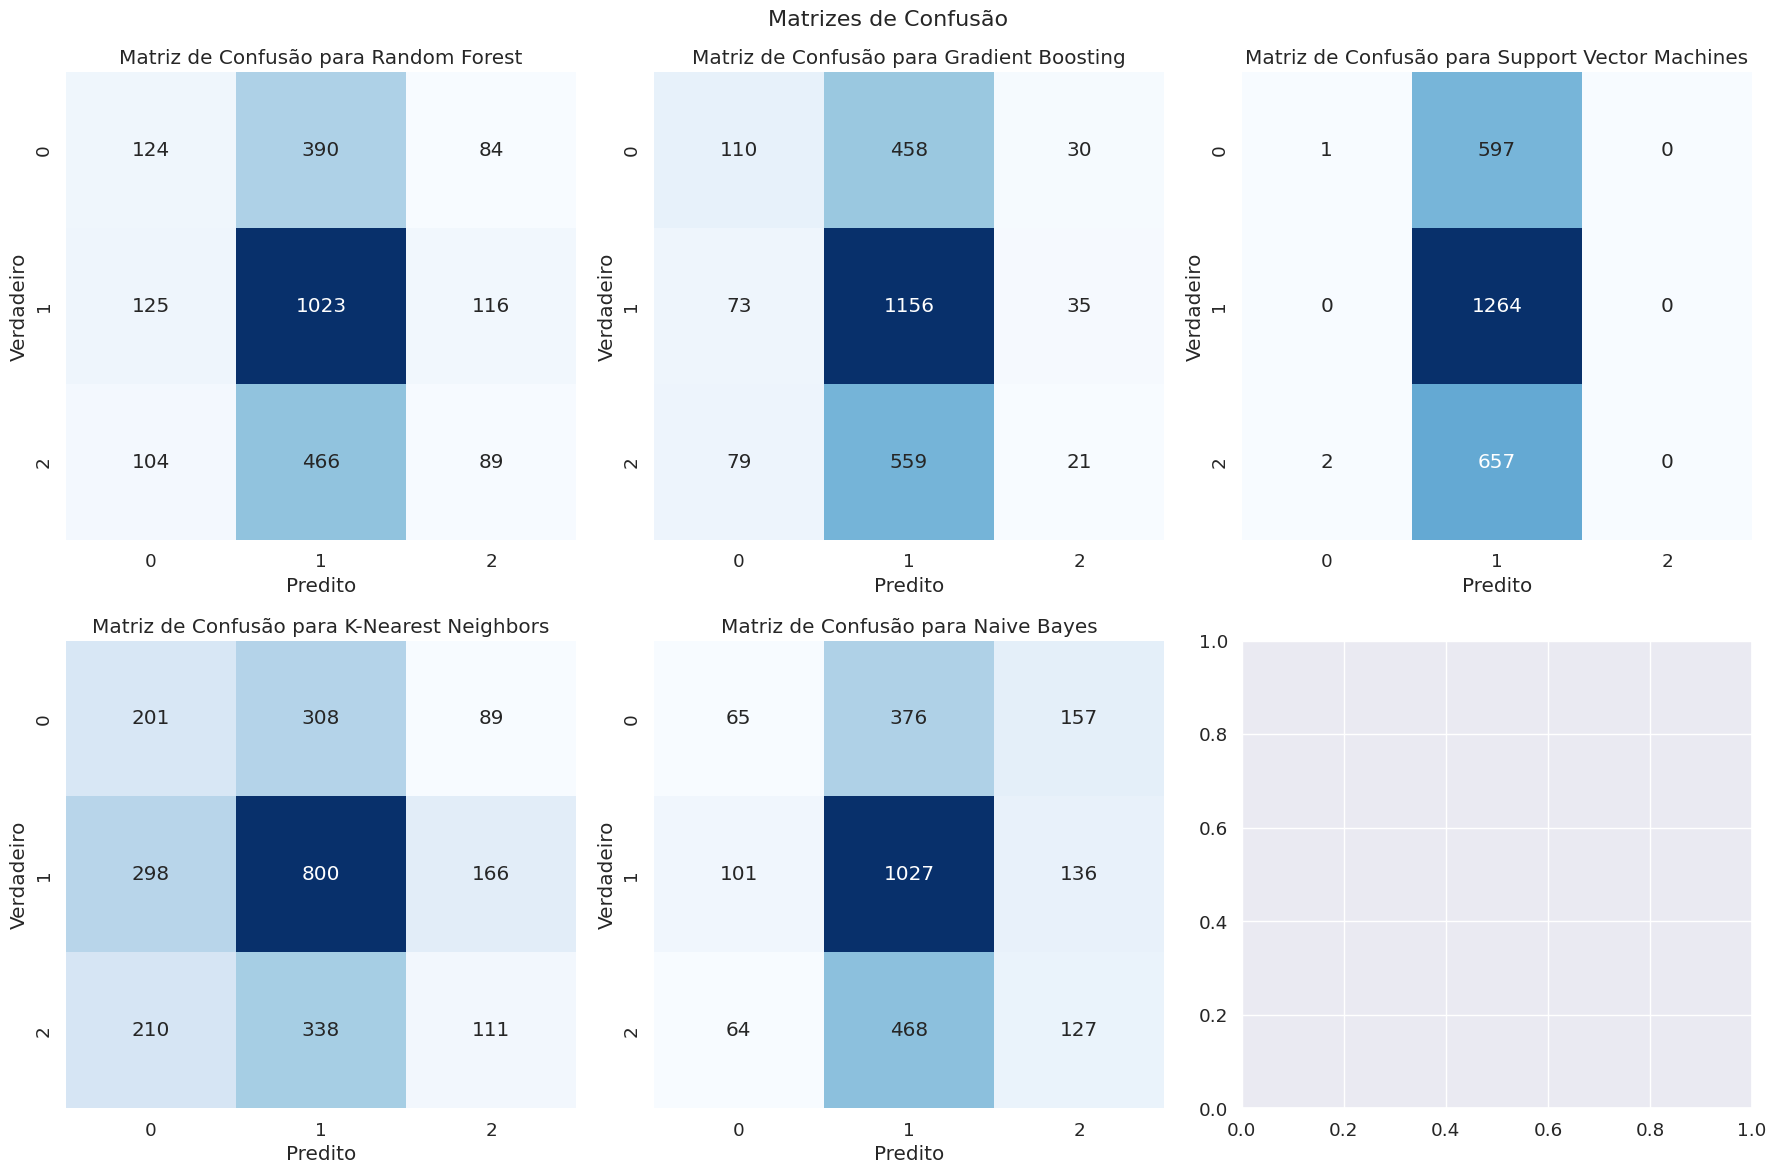

In [ ]:
# Função para imprimir a matriz de confusão como um heatmap em um subplot
def plot_confusion_matrix_subplot(ax, nome_modelo, y_true, y_pred):
    matriz = confusion_matrix(y_true, y_pred)
    sns.set(font_scale=1.2)
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Verdadeiro')
    ax.set_title(f'Matriz de Confusão para {nome_modelo}')

# Criar uma figura com subplots agrupados a cada 3
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_confusion_matrix_subplot(axs[0, 0], "Random Forest", y_test, rf_pred)
plot_confusion_matrix_subplot(axs[0, 1], "Gradient Boosting", y_test, gb_pred)
plot_confusion_matrix_subplot(axs[0, 2], "Support Vector Machines", y_test, svc_pred)
plot_confusion_matrix_subplot(axs[1, 0], "K-Nearest Neighbors", y_test, knn_pred)
plot_confusion_matrix_subplot(axs[1, 1], "Naive Bayes", y_test, nb_pred)

plt.suptitle('Matrizes de Confusão', fontsize=16)

plt.tight_layout()
plt.show()

<a id="4"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">6. Otimização do modelo:</p>

Nessa etapa , vamos buscar por hiperparâmetros usando GridSearchCV para encontrar a combinação de parâmetros que maximiza a acurácia.

In [135]:
param_grid = {
    'n_estimators': [1, 3, 5, 6, 7, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150],
    'learning_rate': [0.01, 0.02, 0.1, 0.5],
    'max_depth': [1, 2, 3, 4, 5, 7, 10, 15]
}

gb2 = GradientBoostingClassifier(random_state=99)

grid_search = GridSearchCV(estimator=gb2, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Melhor Score:", grid_search.best_score_)
print("Melhores Parâmetros:", grid_search.best_params_)

best_gb = grid_search.best_estimator_
best_gb_pred = best_gb.predict(X_test)

print("Melhor Modelo (Gradient Boosting):")
print(classification_report(y_test, best_gb_pred))

plot_confusion_matrix_subplot(plt.gca(), "Melhor Modelo (Gradient Boosting)", y_test, best_gb_pred)
plt.show()

KeyboardInterrupt: 

Como podemos observar, os resultados com a utilização de hiperparâmetros foram piores, tanto em termos de acurácia quanto de precisão das classes. O modelo apresentou dificuldades especialmente na identificação da classe 1.

<a id="5"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">7. Valiação dos resultados:</p>

Nessa etapa vamos fazer a Geração de previsões, cálculo de acurácia, e exibição de métricas e visualizações de desempenho.

### Testes sem hiperparâmetros:

- Random Forest:

    - A precisão para a classe 1 é baixa, indicando dificuldade em identificar corretamente essa classe.
    - A acurácia geral foi de 51%, com um f1-score médio de 0.43.

- Gradient Boosting:

    - O modelo teve um desempenho melhor que o Random Forest, especialmente para as classes 1.
    - A acurácia geral foi de 50%, com um f1-score médio de 0.47.

- Support Vector Machines (SVM):

    - O SVM teve dificuldades em prever a classe 1, com uma precisão de 0%.
    - A acurácia geral foi de 45%, com um f1-score médio de 0.26.

- K-Nearest Neighbors (KNN):

    - O KNN teve um desempenho intermediário, com precisões e recalls equilibrados para as três classes.
    - A acurácia geral foi de 39%, com um f1-score médio de 0.35.

- Naive Bayes:

    - O Naive Bayes teve dificuldades em prever as classes 1 e 3, com baixa precisão e recall.
    - A acurácia geral foi de 41%, com um f1-score médio de 0.35.



Em geral, nenhum dos modelos apresentou um desempenho excepcional. O Gradient Boosting foi o melhor modelo em termos de acurácia e precisão para as três classes, mas ainda há espaço para melhorias. Vamos considerá-lo como o melhor modelo e tentar melhorar ainda mais seu desempenho ajustando os hiperparâmetros.

### Testes com hiperparâmetros:

- Teve uma acurácia de 46%.
- A classe 1 teve uma precisão de 0%, recall de 0% e f1-score de 0%.
- A classe 2 teve uma precisão de 57%, recall de 9% e f1-score de 15%.
- A classe 3 teve uma precisão de 45%, recall de 97% e f1-score de 62%.


Os resultados com hiperparâmetros mostraram uma precisão significativamente menor para a classe 1, chegando a zero. Isso indica que o modelo com hiperparâmetros teve dificuldades em prever corretamente a classe 1, o que pode ser um indicativo de overfitting.

<a id="5"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">8. Conclusão:</p>

Com uma acurácia próxima de 50% (considerando três classes, o que para o mercado financeiro não é considerado tão ruim), e com a seleção de ativos realizada por um analista com expertise, podemos afirmar que esse método é interessante e merece ser explorado. Embora esperasse uma precisão um pouco maior, não consegui melhorar os resultados. Talvez se tivéssemos mais dados disponíveis, como dados mensais em vez de anuais, poderíamos obter melhores resultados. No entanto, não consegui encontrar esses dados gratuitamente, acredito que apenas uma API paga ofereceria essa possibilidade.

O método atual pode ser explorado com mais ênfase na classe "Barata", visando exclusivamente à compra de ativos. No entanto, o projeto atual propõe uma abordagem que envolve tanto a compra quanto a venda de ativos, exigindo um equilíbrio entre as três classes ("Cara", "Barata" e "Neutra"). Portanto, não podemos priorizar apenas uma classe neste contexto, mas sim considerar o cenário completo para uma análise mais abrangente e equilibrada das decisões de investimento.

* É importante ressaltar que, como o preço do ano atual e do seguinte foi considerado como a média, esse percentual de acerto pode variar significativamente no teste real, pois depende muito do momento da compra ou da venda da ação.

## Exportando o melhor modelo treinado para posteriormente fazer o deploy

In [ ]:
model_dir = '../../data/models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

dump(gb, os.path.join(model_dir, 'gradient_boosting_model.joblib'))

['../../data/models\\gradient_boosting_model.joblib']

# Aplicação em produção

A aplicação em produção foi feita com Streamlit. O objetivo da aplicação é permitir que o usuário obtenha uma análise rápida sobre se uma ação está cara, neutra ou barata com base em indicadores financeiros.

Para isso, o usuário digita o ticker da ação desejada e a aplicação busca os dados dos indicadores financeiros em um arquivo CSV baixado do site Status Invest, que contém os indicadores atualizados de todas as ações. Em seguida, a aplicação utiliza o nosso modelo de machine learning previamente treinado para fazer a análise e retorna a classificação da ação.

Para acessar e ver como está em produção, [clique aqui](https://investlink.streamlit.app/).